In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [4]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
boston= load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


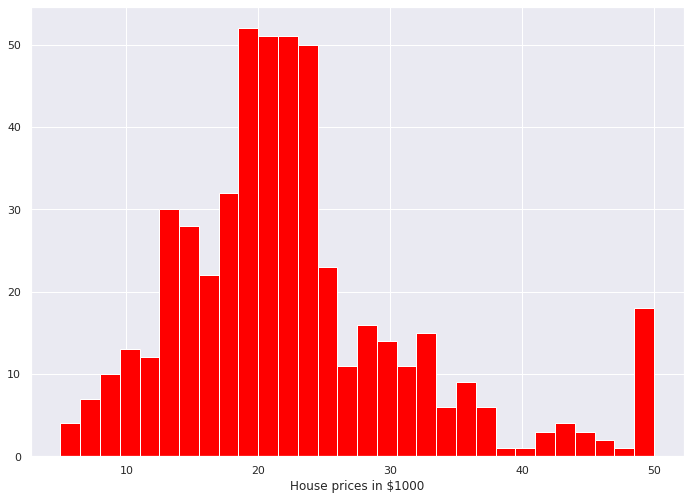

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(bos['PRICE'],color = 'red', bins=30)
plt.xlabel("House prices in $1000")
plt.show()

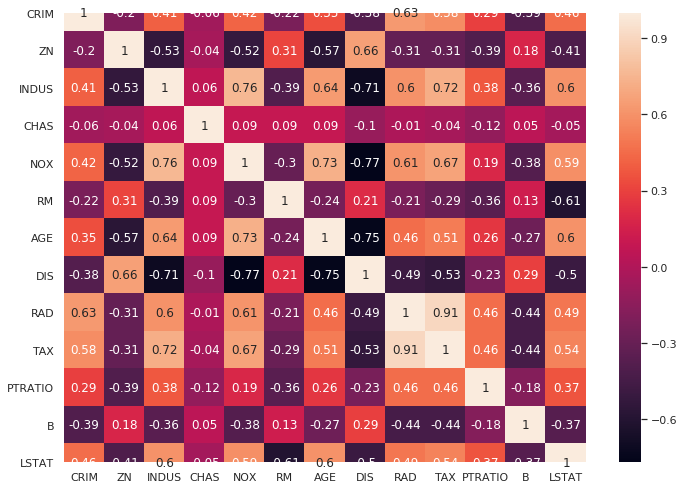

In [9]:
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

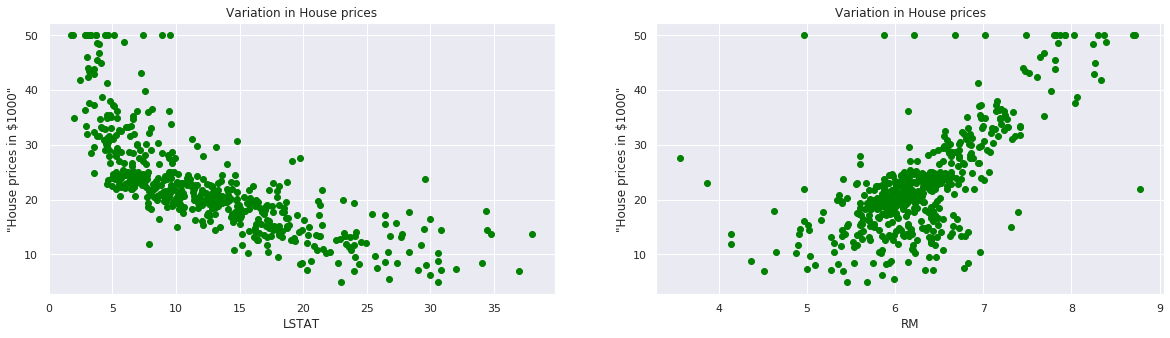

In [10]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y,color='green', marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [11]:
X_rooms = bos.RM
y_price = bos.PRICE


X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)


In [12]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

RMSE is 6.972277149440585
R2 score is 0.43




In [13]:
y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

Root Mean Squared Error: 4.895963186952216
R^2: 0.69




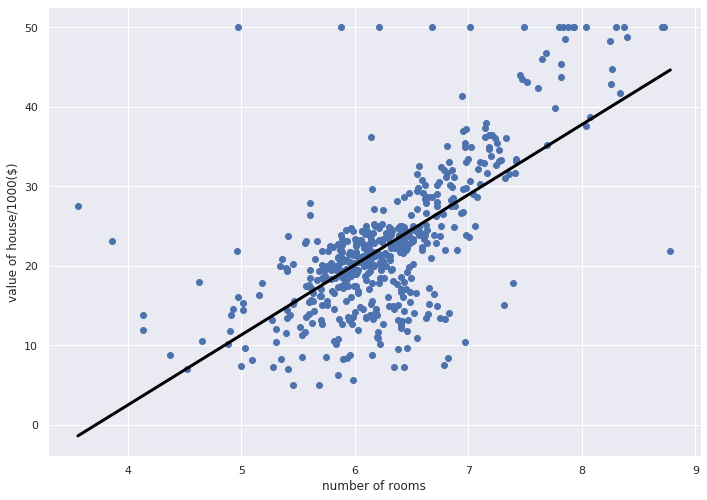

In [14]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of house/1000($)')
plt.xlabel('number of rooms')
plt.show()